# Análisis de la demanda de talles y comportamiento de compra por provincias de Tochana

**Fecha: Marzo-Julio 2025**

**Alumna: Carvajal Ceci, Katja**

**Dataset: Ventas Tochana 6/2023 - 6/2024 (mercadolibre) y Datos de contacto de compradores históricos (sitio web)**

1.  ORIGEN DE LOS DATOS

La información utilizada para el análisis del presente proviene de la plataforma de comercio electrónico Mercado Libre, específicamente de la marca de indumentaria femenina Tochana. Esta marca se caracteriza por ofrecer una amplia curva de talles que abarca desde el talle M hasta el 5XL, destacándose por atender un segmento poco explorado en el mercado de ropa femenina. El período de análisis comprende desde el 06 de junio de 2023 hasta el 06 de junio de 2024, e incluye datos detallados de cada transacción realizada en ese intervalo. Entre los datos recopilados se encuentran: descripción del producto, talle, precio y datos del comprador. Todas las transacciones analizadas corresponden exclusivamente a operaciones realizadas dentro del territorio argentino. Además se agrega para el análisis geográfico la base de datos del sitio web de la marca de donde se destacan la localidad de los compradores. Dicha base de datos no se considera histórica por la marca, debido que se construyó cuando comenzó la venta online en el año 2021 hasta Abril 2025.

2.  PREGUNTAS DE INTERES

*   ¿Cuál es el talle más vendido a nivel nacional?

    *  ¿Existen diferencias significativas en la venta de talles grandes (2XL, 3XL, 4XL y 5XL) y pequeños (M, L, XL)?

*  ¿Qué provincias presentan la mayor cantidad de ventas?

  *  ¿Las zonas con más ventas también tienen mayores ingresos totales?

  *  ¿Existen diferencias en la demanda de talles grandes o pequeños según la provincia?

*  ¿Dónde se observa la mayor fidelidad de los clientes (frecuencia de compra alta)?

*  ¿Hay diferencias entre las zonas con mayores ventas entre la web y la plataforma de mercadolibre?

3. HIPÓTESIS


*Preferencia por talles grandes:* Dada la limitada oferta de talles grandes en el mercado y la extensa curva de talles ofrecida por Tochana, se espera que los talles más grandes (2XL, 3XL, 4XL y 5XL) sean los más demandados en comparación con los talles más pequeños (S, M, L, XL), que enfrentan una mayor competencia en el mercado.

*Variación regional de la demanda:* Se espera que la demanda de los productos de la marca Tochana en las provincias del interior muestren mayores tasas de fidelidad por menor competencia local

# SENTENCIAS

In [1]:
#importo las librerías a usar

# Bibliotecas para manejo de datos y operaciones matemáticas
import pandas as pd
import numpy as np

# Bibliotecas para visualización de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV



In [2]:
colores_marca = ['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Ventas Tochana 2023_2024.xlsx'
df = pd.read_excel(archivo_excel)

In [5]:
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Clientes web 2021 2025.xlsx'
dfweb = pd.read_excel(archivo_excel)

# **Análisis exploratorio de la base de datos de ventas de Mercadolibre**

In [6]:
#Veo el tamaño del dataset de ventas
df.shape

(3508, 9)

In [7]:
#Veo que tipo de datos para cada columna
df.dtypes

,0
ID_venta,int64
ID_clientes,object
Ingresos por productos (ARS),float64
Cargo por venta e impuestos,float64
Costos de envío,float64
Total (ARS),float64
ID_publicaciones,object
ID_Color,float64
ID_Talle,float64


In [8]:
#Obtengo una vista general del dataset
display(df.head())

,ID_venta,ID_clientes,Ingresos por productos (ARS),Cargo por venta e impuestos,Costos de envío,Total (ARS),ID_publicaciones,ID_Color,ID_Talle
0,2000008457000154,31474330,29999.00,-5347.32,-4182.99,20468.69,MLA667305456,1.0,6.0
1,2000008456300770,27277464018,30689.07,-5009.99,-4182.99,21496.09,MLA1374337563,2.0,8.0
2,2000008455133668,31474330,29999.00,-5347.32,-4182.99,0.00,MLA667305456,3.0,6.0
3,2000008454386024,20475232,28999.00,-4734.08,-4182.99,20081.93,MLA1141435462,4.0,7.0
4,2000008454078018,39089306,30599.10,-4995.30,-4182.99,21420.81,MLA920008017,5.0,8.0


In [9]:
print(df.columns)

Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')


In [10]:
#Leo el Excel e imprimo los nombres de las hojas disponibles del archivo
archivo_excel = '/content/drive/MyDrive/Data Scientist /Data Science II/Proyecto/Ventas Tochana 2023_2024.xlsx'

dfs = pd.read_excel(archivo_excel, sheet_name=None)

print(dfs.keys())

dict_keys(['Ventas', 'Publicaciones', 'Categoría', 'Talle', 'Color', 'Clientes', 'Ciudad', 'Provincia'])


El dataset utilizado cuenta con ocho solapas:

Ventas

Publicaciones

Categoría

Talle

Color

Clientes

Ciudad

Provincia

Transformé cada una en un dataframe para poder utilizarlos a lo largo del análisis

In [11]:
df_ventas = dfs['Ventas']
df_publicaciones = dfs['Publicaciones']
df_categoria = dfs['Categoría']
df_talle = dfs['Talle']
df_color = dfs['Color']
df_clientes = dfs['Clientes']
df_ciudad = dfs['Ciudad']
df_provincia = dfs['Provincia']

In [12]:
display("Ventas:")
display(df_ventas.head())
display("\nPublicaciones:")
display(df_publicaciones.head())
display("\nCategoría:")
display(df_categoria.head())
display("\nTalle:")
display(df_talle.head())
display("\nColor:")
display(df_color.head())
display("\nClientes:")
display(df_clientes.head())
display("\nCiudad:")
display(df_ciudad.head())
display("\nProvincia:")
display(df_provincia.head())

'Ventas:'

,ID_venta,ID_clientes,Ingresos por productos (ARS),Cargo por venta e impuestos,Costos de envío,Total (ARS),ID_publicaciones,ID_Color,ID_Talle
0,2000008457000154,31474330,29999.00,-5347.32,-4182.99,20468.69,MLA667305456,1.0,6.0
1,2000008456300770,27277464018,30689.07,-5009.99,-4182.99,21496.09,MLA1374337563,2.0,8.0
2,2000008455133668,31474330,29999.00,-5347.32,-4182.99,0.00,MLA667305456,3.0,6.0
3,2000008454386024,20475232,28999.00,-4734.08,-4182.99,20081.93,MLA1141435462,4.0,7.0
4,2000008454078018,39089306,30599.10,-4995.30,-4182.99,21420.81,MLA920008017,5.0,8.0


'\nPublicaciones:'

,id_publicacion,Título,id_categoría,Visitas totales,Ventas totales
0,1108231655,Vestido Largo Cruzado Seda Fria Talles Grandes...,1,90189,1651
1,886360539,Vestido Largo More Con Bolsillos Talles Grande...,1,32165,817
2,1117143028,Vestido More Corto Seda Fria Talles Grandes Y ...,1,29172,566
3,830849228,Vestido Luce Manga Corta Con Bolsillos Talles ...,1,16596,476
4,914742415,Pantalon Bengalina Super Elastizada Talle Gran...,2,15808,476


'\nCategoría:'

,id_categoría,Nombre_categoria
0,1,Vestidos
1,2,Pantalones
2,3,"Remeras, Musculosas y Chombas"
3,4,Buzos y Hoodies
4,5,"Camperas, Tapados y Trenchs"


'\nTalle:'

,ID_Talle,nombre_Talle
0,1,S
1,2,M
2,3,L
3,4,XL
4,5,2XL


'\nColor:'

,ID_Color,nombre_Color
0,1,Azul marino
1,2,Aero
2,3,Bordó ( MODAL)
3,4,Gris
4,5,Borgoña


'\nClientes:'

,id_cliente,Primer nombre,Segundo nombre,Apellido,Id_Ciudad,Código postal
0,31474330,Irene,Claudina,Mendoza,1.0,3040.0
1,27277464018,Valeria,Soledad,Casanova,2.0,2820.0
2,20475232,Julio,Cesa,Rodriguez,3.0,1885.0
3,39089306,Paula,Valle,Benitez,4.0,5600.0
4,43339445,Brenda,Suyai,Espinoza,5.0,8300.0


'\nCiudad:'

,Id_Ciudad,Ciudad,id_provincia
0,1,San Justo,1
1,2,Gualeguaychú,2
2,3,Guillermo E Hudson,3
3,4,Las Heras,4
4,5,Neuquén,5


'\nProvincia:'

,id_provincia,Provincia
0,1,Santa Fe
1,2,Entre Ríos
2,3,Buenos Aires
3,4,Mendoza
4,5,Neuquen


In [13]:
print(df_ventas.columns)
print(df_talle.columns)

Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')
Index(['ID_Talle', 'nombre_Talle'], dtype='object')


In [14]:
# Relacion talle / ingresos
ventas_talle = df_ventas.merge(df_talle, on='ID_Talle', how='left')
ventas_por_talle = ventas_talle.groupby('nombre_Talle')['Ingresos por productos (ARS)'].sum().reset_index()
ventas_por_talle = ventas_por_talle.sort_values(by='Ingresos por productos (ARS)', ascending=False)

ventas_por_talle


,nombre_Talle,Ingresos por productos (ARS)
3,5XL,20200062.41
2,4XL,10349461.01
1,3XL,7656586.20
0,2XL,6175686.50
7,XL,4640499.28
4,L,1982458.00
5,M,1169066.79
6,S,73995.00


**¿Cuál es el talle más vendido a nivel nacional?**

In [15]:
ventas_talle = df_ventas.merge(df_talle, on='ID_Talle', how='left')
ventas_por_talle = ventas_talle.groupby('nombre_Talle').size().reset_index(name='Unidades_vendidas')

# Ordeno de mayor a menor para una visualizacion mas clara
ventas_por_talle = ventas_por_talle.sort_values(by='Unidades_vendidas', ascending=False)

ventas_por_talle


,nombre_Talle,Unidades_vendidas
3,5XL,1055
2,4XL,663
1,3XL,512
0,2XL,410
7,XL,281
5,M,129
4,L,121
6,S,8


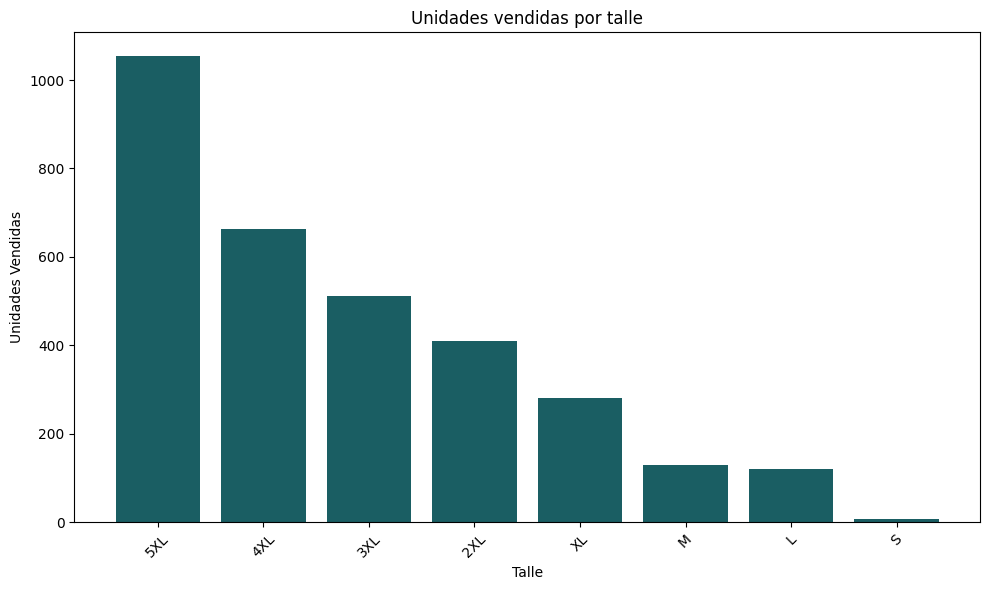

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_talle['nombre_Talle'],
        ventas_por_talle['Unidades_vendidas'],
        color=colores_marca[0])
plt.xlabel('Talle')
plt.ylabel('Unidades Vendidas')
plt.title('Unidades vendidas por talle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
print(df_clientes.columns)
print(df_ventas.columns)
print(df_provincia.columns)

Index(['id_cliente', 'Primer nombre', 'Segundo nombre', 'Apellido',
       'Id_Ciudad', 'Código postal'],
      dtype='object')
Index(['ID_venta', 'ID_clientes', 'Ingresos por productos (ARS)',
       'Cargo por venta e impuestos', 'Costos de envío', 'Total (ARS)',
       'ID_publicaciones', 'ID_Color', 'ID_Talle'],
      dtype='object')
Index(['id_provincia', 'Provincia'], dtype='object')


In [18]:
df_ventas['ID_clientes'] = pd.to_numeric(df_ventas['ID_clientes'], errors='coerce')
df_ventas_clientes = df_ventas.merge(df_clientes, left_on='ID_clientes', right_on='id_cliente')
df_ventas_ciudad = df_ventas_clientes.merge(df_ciudad, left_on='Id_Ciudad', right_on='Id_Ciudad')
df_ventas_provincia = df_ventas_ciudad.merge(df_provincia, left_on='id_provincia', right_on='id_provincia')

**¿Qué provincias presentan la mayor cantidad de ventas?**

/tmp/ipython-input-1262378564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)
/tmp/ipython-input-1262378564.py:6: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)


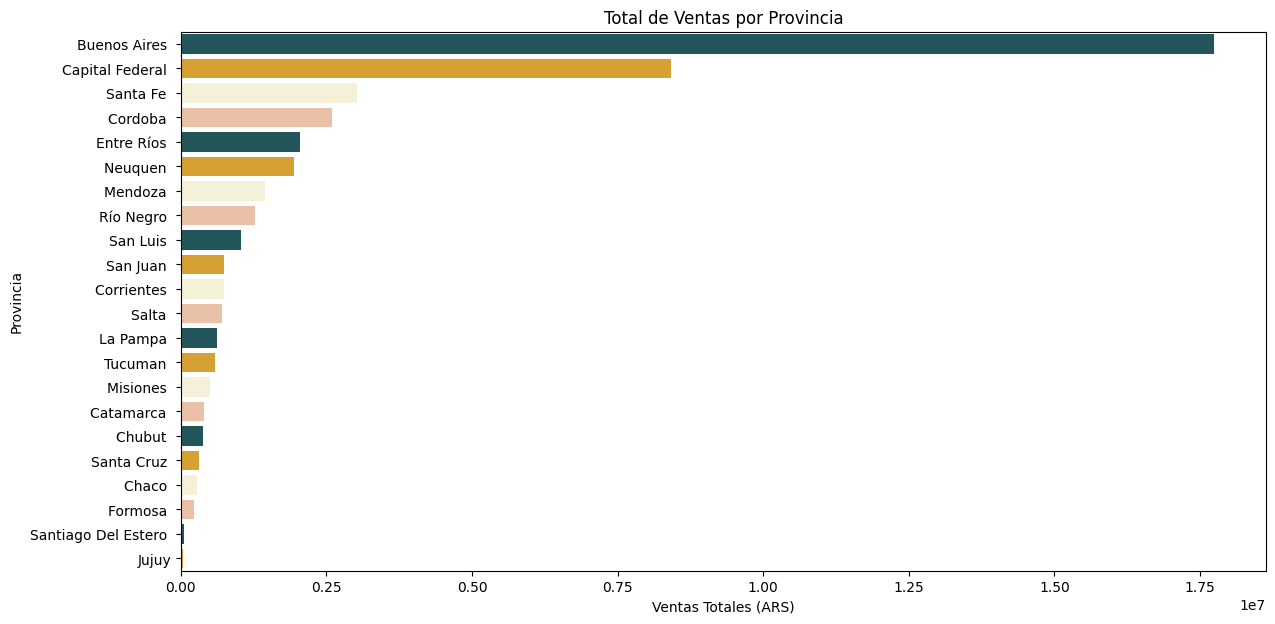

In [19]:

ventas_por_provincia = df_ventas_provincia.groupby('Provincia')['Total (ARS)'].sum().reset_index()

ventas_por_provincia = ventas_por_provincia.sort_values(by='Total (ARS)', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_por_provincia, x='Total (ARS)', y='Provincia', palette=colores_marca)
plt.title('Total de Ventas por Provincia')
plt.xlabel('Ventas Totales (ARS)')
plt.ylabel('Provincia')
plt.show()

In [20]:
ventas_por_provincia


,Provincia,Total (ARS)
0,Buenos Aires,17744938.69
1,Capital Federal,8423509.51
19,Santa Fe,3015803.82
5,Cordoba,2601190.19
7,Entre Ríos,2051316.93
13,Neuquen,1940519.50
11,Mendoza,1452353.81
14,Río Negro,1268734.99
17,San Luis,1035122.72
16,San Juan,747597.88


El gráfico da cuenta de una mayor cantidad de ventas en la provincia de Buenos Aires en comparación con el interior del país en términos de ventas netas. Sin embargo es insuficiente para poner a prueba la hipótesis de que en el intrior del país más gente por población elije la marca debido a la poca oferta ya que el gráfico no toma en cuenta la densidad demográfica. Por lo cuál se profundiza el análisis con tal fin tomando en cuenta los datos del último Censo llevado a cabo en Argentina en el año 2022.

Obs.: Informacion extraída desde https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-165

In [21]:
data = {
    'Provincia': [
        'Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
        'Cordoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
        'La Pampa', 'Mendoza', 'Misiones', 'Neuquen',
        'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
        'Santa Fe', 'Santiago Del Estero', 'Tucuman'
    ],
    'Poblacion': [
        17569677, 3169990, 433764, 1153818, 618746,
        3973160, 1099423, 1290975, 600702, 769634,
        371216, 1886503, 1164827, 771653,
        748056, 1357012, 825144, 477424, 273964,
        3670575, 1043821, 1604886
    ]
}

df_poblacion = pd.DataFrame(data)

display(df_poblacion)

,Provincia,Poblacion
0,Buenos Aires,17569677
1,Capital Federal,3169990
2,Catamarca,433764
3,Chaco,1153818
4,Chubut,618746
5,Cordoba,3973160
6,Corrientes,1099423
7,Entre Ríos,1290975
8,Formosa,600702
9,Jujuy,769634


In [22]:
ventas_por_provincia['Provincia'] = ventas_por_provincia['Provincia'].str.strip() #utilicé el "strip" para eliminar los espacios en blanco porque no me coincidian los nombres en ambos dataframe
df_poblacion['Provincia'] = df_poblacion['Provincia'].str.strip()

ventas_con_poblacion = ventas_por_provincia.merge(df_poblacion, on='Provincia', how='left')

display(ventas_con_poblacion)


,Provincia,Total (ARS),Poblacion
0,Buenos Aires,17744938.69,17569677
1,Capital Federal,8423509.51,3169990
2,Santa Fe,3015803.82,3670575
3,Cordoba,2601190.19,3973160
4,Entre Ríos,2051316.93,1290975
5,Neuquen,1940519.50,771653
6,Mendoza,1452353.81,1886503
7,Río Negro,1268734.99,748056
8,San Luis,1035122.72,477424
9,San Juan,747597.88,825144


In [23]:
ventas_con_poblacion['Ventas por Habitante'] = ventas_con_poblacion['Total (ARS)'] / ventas_con_poblacion['Poblacion']

In [24]:
Ventas_con_poblacion = ventas_con_poblacion.sort_values(by='Ventas por Habitante', ascending=False)

/tmp/ipython-input-1321930039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)
/tmp/ipython-input-1321930039.py:3: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)


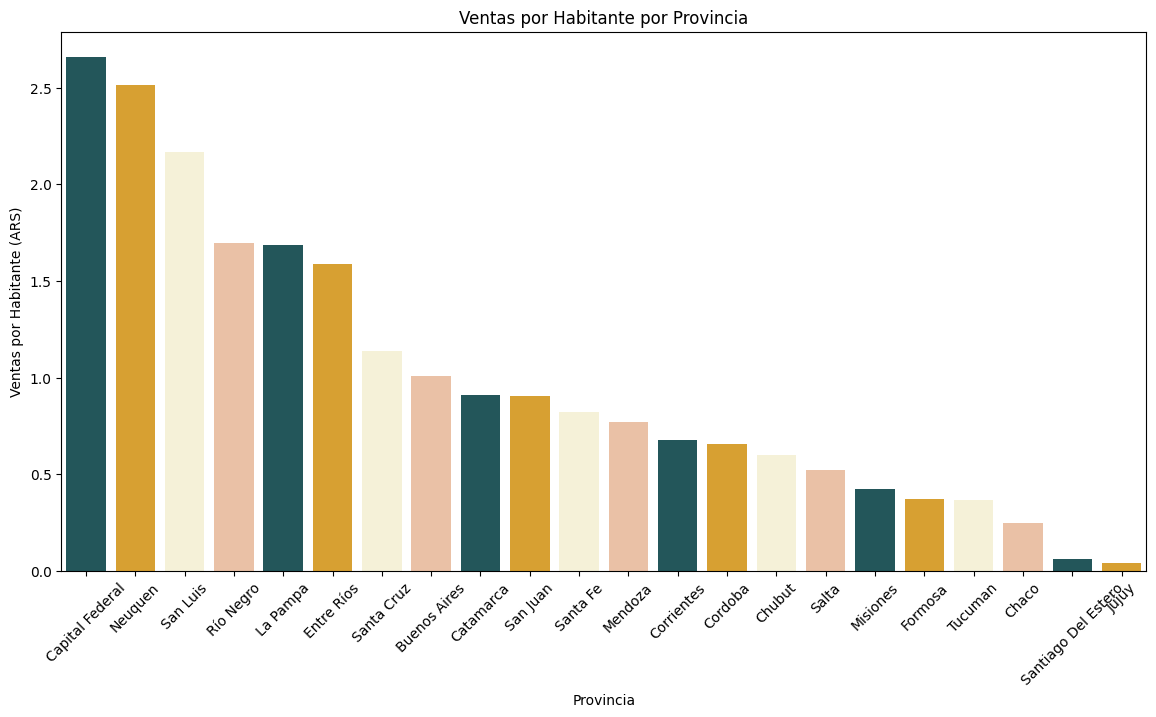

In [25]:
ventas_con_poblacion = ventas_con_poblacion.sort_values(by='Ventas por Habitante', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_con_poblacion, x='Provincia', y='Ventas por Habitante', palette=colores_marca)
plt.title('Ventas por Habitante por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Ventas por Habitante (ARS)')
plt.xticks(rotation=45)
plt.show()

Se observa que al introducir la densidad demográfica como variante de análisis las ventas por provincias varían. Se puede observar como la Provincia de Buenos Aires que superaba en ventas al resto del país quedó por debajo de siete provincias. Siendo la Ciudad Autónoma de Buenos Aires (CABA) el distrito que condensa la mayor cantida de ventas por habitante.

En términos analíticos a diferencia del gráfico anterior se puede ver que si analizamos a las ventas concretadas en Buenos Aires y CABA en comparación con la suma del resto de las provincias se puede inferir que la mayor cantidad de ventas concretadas por cantidad de habitantes son en el interior del país. En relación a la hipótesis planteada en terminos de competitividad sigue siendo posible pensar que en el interior del país hay menor cantida de oferta de indumentaria femenina en talles reales por lo cuál mayor cantidad de personas eligen la marca.

In [26]:
df_ventas.columns = df_ventas.columns.str.lower()
df_talle.columns = df_talle.columns.str.lower()
df_clientes.columns = df_clientes.columns.str.lower()
df_ciudad.columns = df_ciudad.columns.str.lower()
df_provincia.columns = df_provincia.columns.str.lower()


**¿Las zonas con más ventas también tienen mayores ingresos totales?**

In [27]:
ventas_clientes = df_ventas.merge(df_clientes, left_on='id_clientes', right_on='id_cliente', how='left')

ventas_clientes_ciudad = ventas_clientes.merge(df_ciudad, left_on='id_ciudad', right_on='id_ciudad', how='left')

ventas_full = ventas_clientes_ciudad.merge(df_provincia, left_on='id_provincia', right_on='id_provincia', how='left')

ventas_por_provincia = ventas_full.groupby('provincia').size().reset_index(name='cantidad_ventas')

ingresos_por_provincia = ventas_full.groupby('provincia')['total (ars)'].sum().reset_index(name='ingresos_totales')

zona_ventas_ingresos = ventas_por_provincia.merge(ingresos_por_provincia, on='provincia')


/tmp/ipython-input-3248936353.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


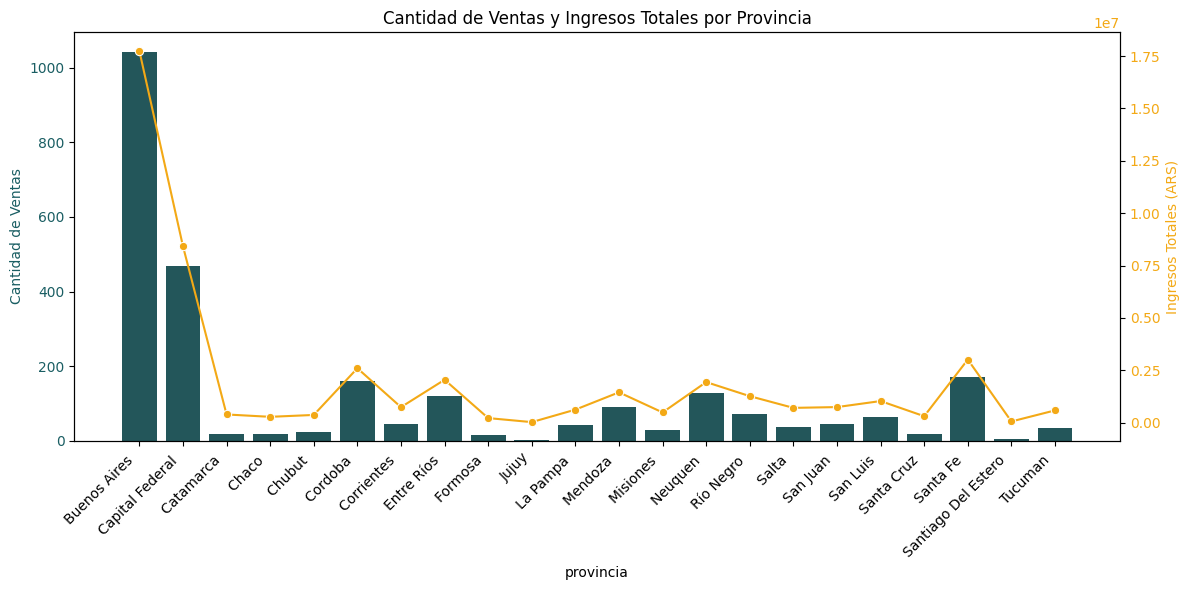

In [28]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x='provincia', y='cantidad_ventas', data=zona_ventas_ingresos, color='#1a5e63', ax=ax1)
ax1.set_ylabel('Cantidad de Ventas', color='#1a5e63')
ax1.tick_params(axis='y', labelcolor='#1a5e63')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(x='provincia', y='ingresos_totales', data=zona_ventas_ingresos, color='#f3a916', marker='o', ax=ax2)
ax2.set_ylabel('Ingresos Totales (ARS)', color='#f3a916')
ax2.tick_params(axis='y', labelcolor='#f3a916')

plt.title('Cantidad de Ventas y Ingresos Totales por Provincia')
plt.tight_layout()
plt.show()


Existe una relación directa entre cantida de ventas e ingresos

**¿Existen diferencias en la demanda de talles grandes o chicos según la provincia?**

In [29]:
#Agrego el dato del talle a la variable creada de ventas full
ventas_full_talle = ventas_full.merge(df_talle, left_on='id_talle', right_on='id_talle', how='left')


In [30]:
#Clasifico los talles chicos y los talles grandes para analizarlos en grupo
talles_chicos = ['M', 'L', 'XL']
talles_grandes = ['2XL', '3XL', '4XL','5XL']

def clasificar_talle(talle):
    if talle in talles_chicos:
        return 'Chico'
    elif talle in talles_grandes:
        return 'Grande'
    else:
        return 'Intermedio'

ventas_full_talle['categoria_talle'] = ventas_full_talle['nombre_talle'].apply(clasificar_talle)

ventas_por_provincia_talle = ventas_full_talle.groupby(['provincia', 'categoria_talle']).size().reset_index(name='cantidad_ventas')


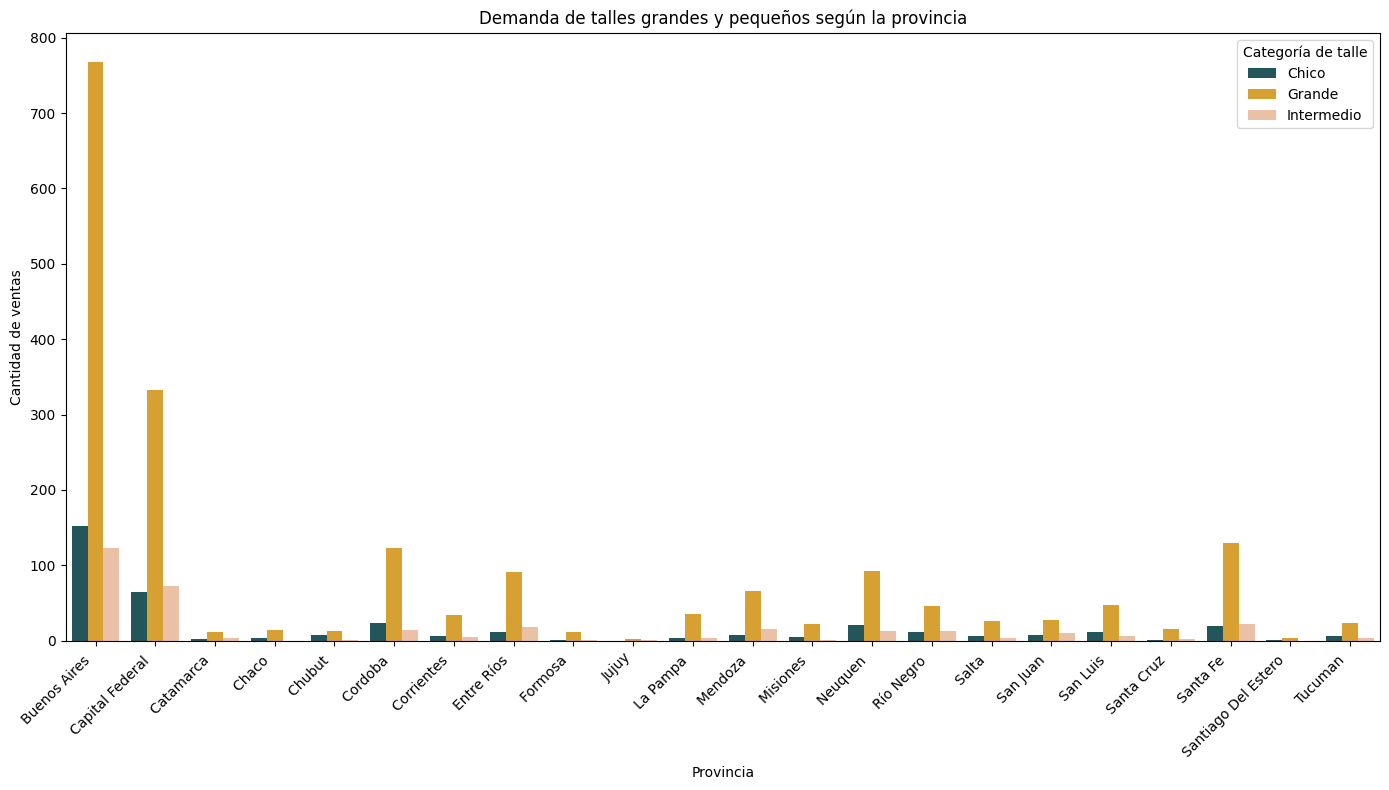

In [31]:
plt.figure(figsize=(14,8))
sns.barplot(x='provincia', y='cantidad_ventas', hue='categoria_talle', data=ventas_por_provincia_talle, palette=['#1a5e63', '#f3a916', '#f6be9a'])
plt.xticks(rotation=45, ha='right')
plt.title('Demanda de talles grandes y pequeños según la provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de ventas')
plt.legend(title='Categoría de talle')
plt.tight_layout()
plt.show()


Se observa una tendencia en todas las provincias a los talles grandes, no se aprecian diferencias geograficas considerables

*  ¿Qué combinación de talle y región representa la mayor oportunidad de ventas para la marca?

In [32]:
# Agrupo por provincia y talle, contamos ventas
ventas_talle_provincia = ventas_full_talle.groupby(['provincia', 'nombre_talle']).size().reset_index(name='cantidad_ventas')

tabla_calor = ventas_talle_provincia.pivot(index='nombre_talle', columns='provincia', values='cantidad_ventas').fillna(0)



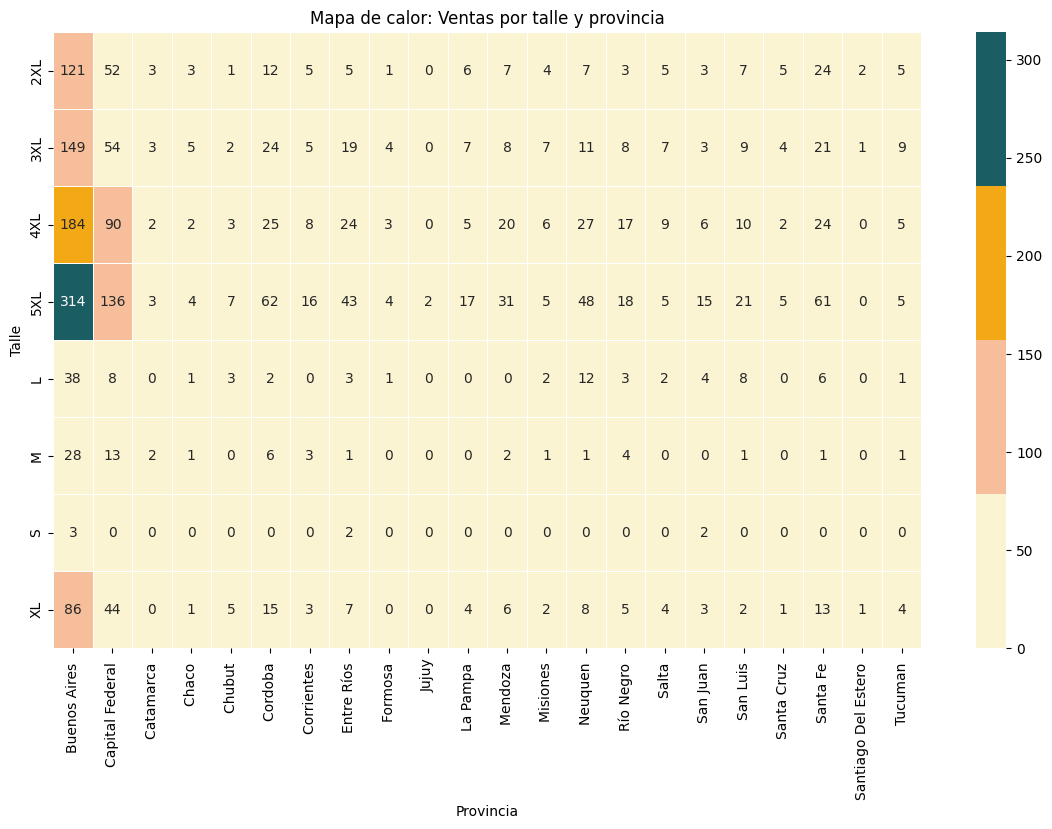

In [33]:
plt.figure(figsize=(14, 8))
sns.heatmap(tabla_calor, cmap=sns.color_palette(['#faf4d3', '#f6be9a', '#f3a916', '#1a5e63']), annot=True, fmt='.0f', linewidths=0.5)
plt.title('Mapa de calor: Ventas por talle y provincia')
plt.xlabel('Provincia')
plt.ylabel('Talle')
plt.show()


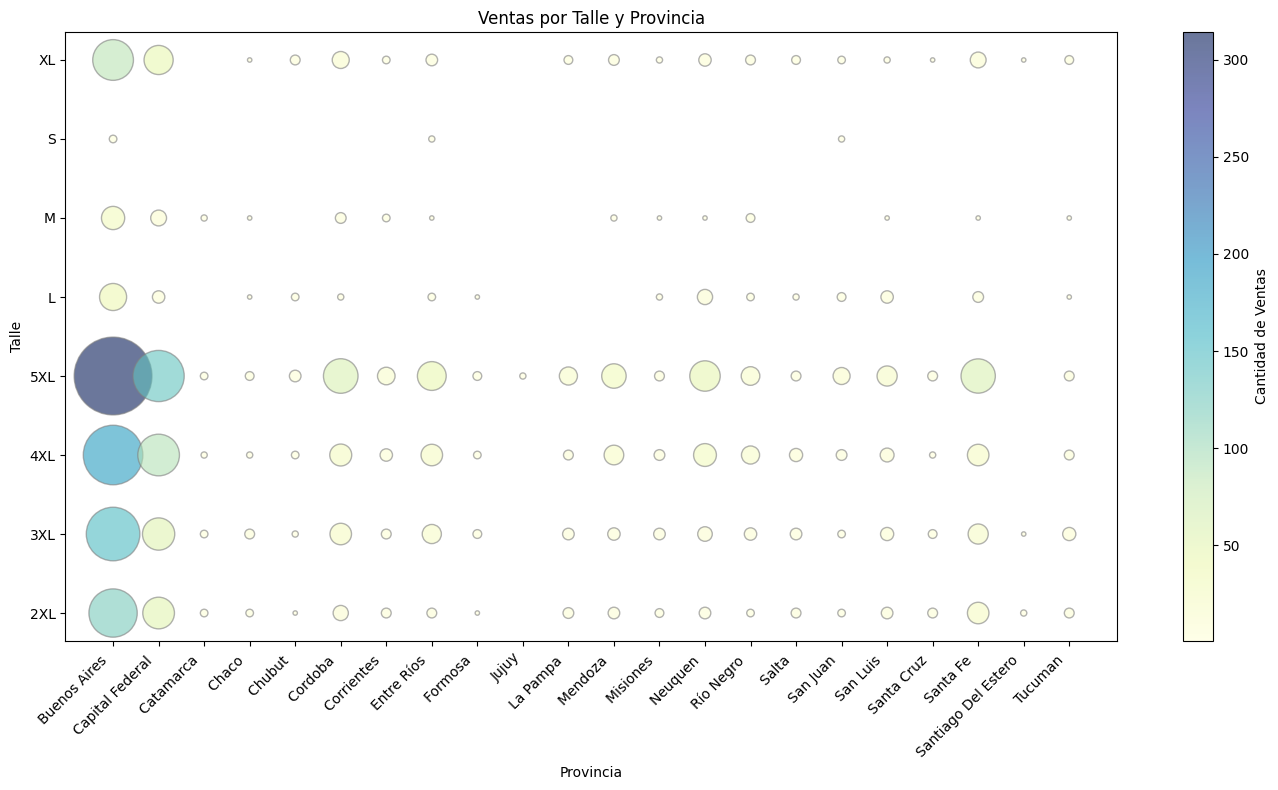

In [34]:
plt.figure(figsize=(14, 8))

# Debido a que hay mucha diferencias entre talles escalo los tamaños de las burbujas para que no sean demasiado grandes
tamanio = ventas_talle_provincia['cantidad_ventas'] * 10

plt.scatter(
    ventas_talle_provincia['provincia'],
    ventas_talle_provincia['nombre_talle'],
    s=tamanio,
    c=ventas_talle_provincia['cantidad_ventas'],
    cmap='YlGnBu',
    alpha=0.6,
    edgecolors='grey'
)

plt.colorbar(label='Cantidad de Ventas')
plt.xlabel('Provincia')
plt.ylabel('Talle')
plt.title('Ventas por Talle y Provincia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**¿Dónde se observa la mayor fidelidad de los clientes (frecuencia de compra alta)?**

In [35]:
# Calculo frecuencia de compra por cliente
frecuencia_clientes = ventas_full.groupby('id_clientes').size().reset_index(name='frecuencia_compra')
clientes_provincia = ventas_full[['id_clientes', 'provincia']].drop_duplicates(subset='id_clientes')
frecuencia_clientes = frecuencia_clientes.merge(clientes_provincia, on='id_clientes', how='left')


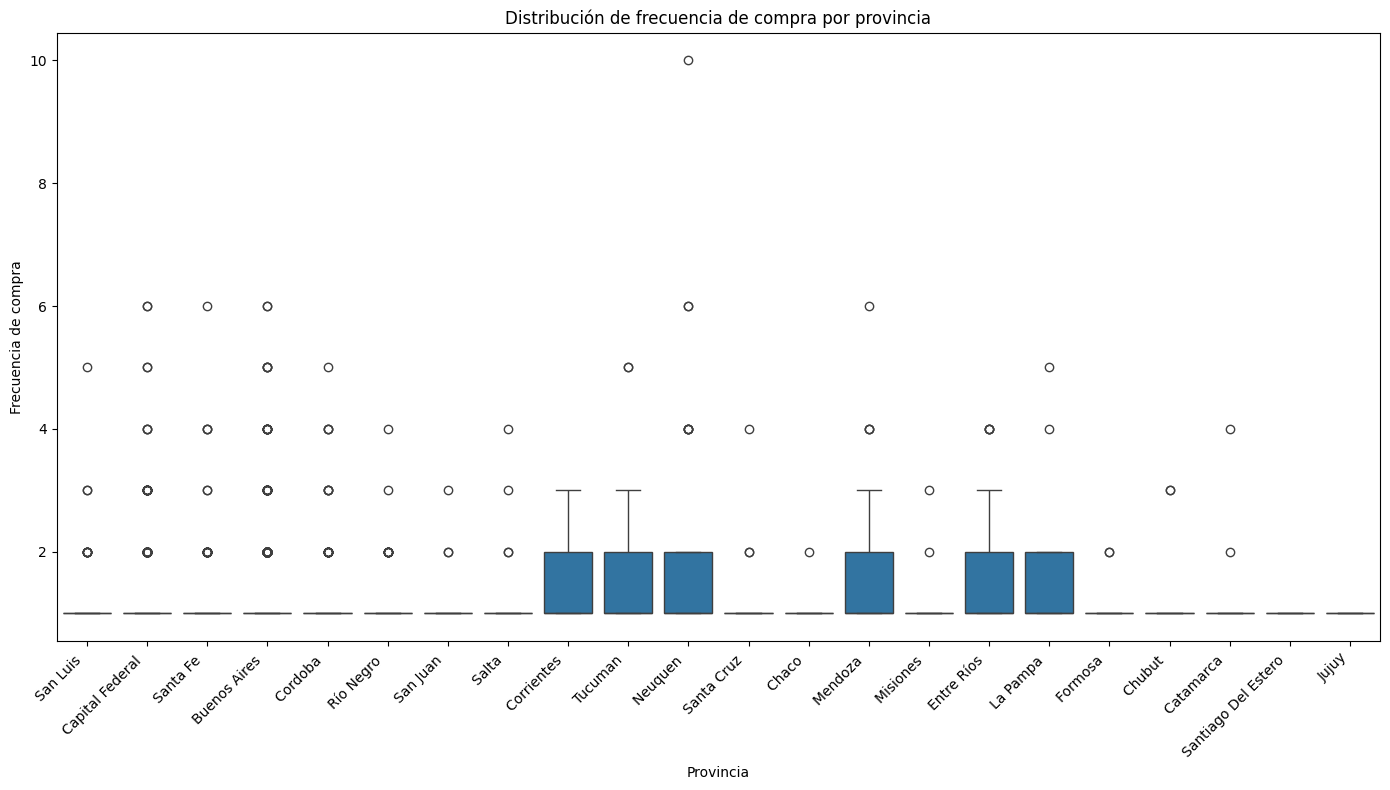

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de frecuencia de compra por provincia')
plt.ylabel('Frecuencia de compra')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()


/tmp/ipython-input-602072968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
/tmp/ipython-input-602072968.py:2: UserWarning: 
The palette list has fewer values (4) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])


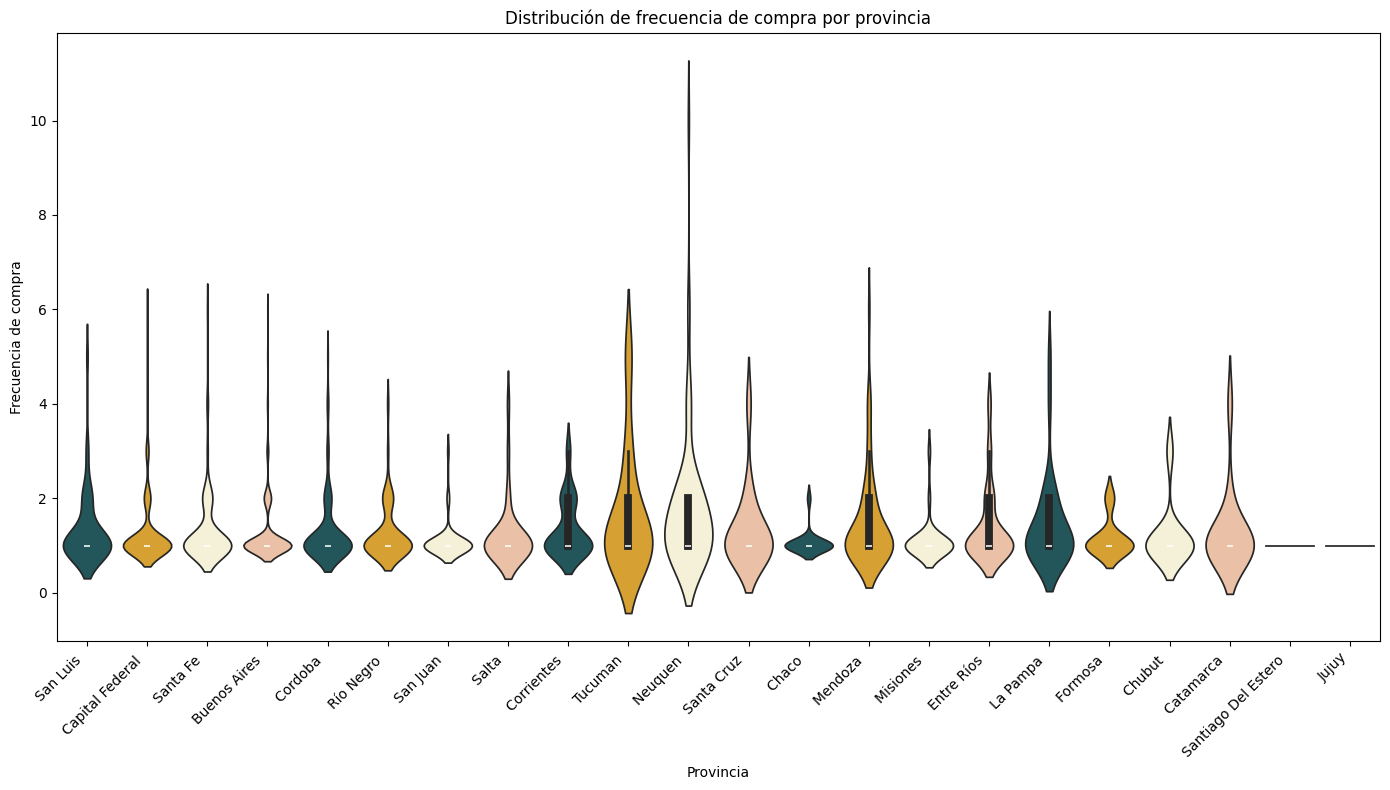

In [37]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=frecuencia_clientes, x='provincia', y='frecuencia_compra', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de frecuencia de compra por provincia')
plt.ylabel('Frecuencia de compra')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()



Se observan en provincias como Tucumán, Neuquén, Santa Cruz y Misiones mayor fidelidad. En provincias como Jujuy, Catamarca y Santiago del Estero observa frecuencia más baja y homogénea.

# **Análisis exploratorio de la base de datos de clientes de la web**

In [38]:
#Veo el tamaño del dataset de clientes de la web
dfweb.shape

(963, 5)

In [39]:
#Veo que tipo de datos para cada columna
dfweb.dtypes

,0
Apellido,object
Primer nombre,object
CP,object
LOCALIDAD,object
PROVINCIA,object


In [40]:
#Transformo la columna de Codigo postal de object a intenger
dfweb['CP'] = pd.to_numeric(dfweb['CP'], errors='coerce').astype('Int64')


In [41]:
print(dfweb['PROVINCIA'].unique())


['Buenos Aires' 'Mendoza' 'CABA' 'Santa Fe' 'CHUBUT' 'Tucuman' 'Usuahia'
 'Neuquén' 'Santiago del estero' 'Chubut' 'Córdoba' 'Santa Cruz'
 'Corrientes' 'Avellaneda' 'buenos Aires' 'San Luis' 'Río Negro' 'Códoba'
 'La Pampa' 'CHACO' 'entre rios' 'Misiones' 'Entre Rios' 'Cordoba'
 'Quilmes' 'Chaco' 'Santiago del Estero' 'Entre Ríos' nan 'Bs As' 'Bs.A.'
 'Rosario' 'San isidro' 'Santa Fé' 'Tucumán' '3 C' 'MENDOZA' 'SAN ISIDRO'
 'Catamarca' 'Bs.As' 'Jujuy' 'Wilde' 'San Juan' 'Mar del Plata'
 'Ballester' 'Tres de Febrero' 'Salta' 'Formosa' 'Capital Federal'
 'Entre Rìos']


In [42]:
mapeo_provincias = {
    'Buenos Aires': 'Buenos Aires',
    'buenos Aires': 'Buenos Aires',
    'Bs As': 'Buenos Aires',
    'Bs.A.': 'Buenos Aires',
    'Bs.As': 'Buenos Aires',

    'CABA': 'CABA',
    'Capital Federal': 'CABA',

    'Cordoba': 'Córdoba',
    'Córdoba': 'Córdoba',
    'Códoba': 'Córdoba',

    'Entre Rios': 'Entre Ríos',
    'entre rios': 'Entre Ríos',
    'Entre Rìos': 'Entre Ríos',

    'Santa Fé': 'Santa Fe',

    'Chaco': 'Chaco',
    'CHACO': 'Chaco',

    'Chubut': 'Chubut',
    'CHUBUT': 'Chubut',

    'MENDOZA': 'Mendoza',

    'San isidro': 'Buenos Aires',
    'SAN ISIDRO': 'Buenos Aires',
    'Avellaneda': 'Buenos Aires',
    'Quilmes': 'Buenos Aires',
    'Rosario': 'Santa Fe',
    'Wilde': 'Buenos Aires',
    'Ballester': 'Buenos Aires',
    'Mar del Plata': 'Buenos Aires',
    'Tres de Febrero': 'Buenos Aires',
    '3 C': 'Buenos Aires',

    'Santiago del estero': 'Santiago del Estero',

    'Mendoza': 'Mendoza',
    'Tucumán': 'Tucumán',
    'Tucuman': 'Tucumán',
    'Neuquén': 'Neuquén',
    'Santa Cruz': 'Santa Cruz',
    'Corrientes': 'Corrientes',
    'San Luis': 'San Luis',
    'Río Negro': 'Río Negro',
    'La Pampa': 'La Pampa',
    'Misiones': 'Misiones',
    'San Juan': 'San Juan',
    'Salta': 'Salta',
    'Formosa': 'Formosa',
    'Jujuy': 'Jujuy',
    'Catamarca': 'Catamarca',
    'Usuahia' : 'Tierra del fuego'
}


In [43]:
dfweb['PROVINCIA'] = dfweb['PROVINCIA'].map(lambda x: mapeo_provincias.get(x, x))


In [44]:
print(dfweb['PROVINCIA'].unique())


['Buenos Aires' 'Mendoza' 'CABA' 'Santa Fe' 'Chubut' 'Tucumán'
 'Tierra del fuego' 'Neuquén' 'Santiago del Estero' 'Córdoba' 'Santa Cruz'
 'Corrientes' 'San Luis' 'Río Negro' 'La Pampa' 'Chaco' 'Entre Ríos'
 'Misiones' nan 'Catamarca' 'Jujuy' 'San Juan' 'Salta' 'Formosa']


Si bien esta base de datos no contiene información directa sobre las ventas, puedo establecer una relación entre la provincia y la cantidad de clientes. Este análisis permite tener un acercamiento al comportamiento de las ventas en el sitio web. Sin embargo, es importante destacar que no es completamente fiable, ya que un mismo cliente podría haber realizado múltiples compras y/o adquirido varias prendas. Aun así, si se observa una tendencia clara en la distribución de clientes por provincia, puede aportar información valiosa para contrastar con la realidad de las ventas mediante Mercadolibre

In [45]:
# Relación provincia / clientes
clientes_por_provincia = dfweb.groupby('PROVINCIA').size().reset_index(name='Cantidad_clientes')

clientes_por_provincia = clientes_por_provincia.sort_values(by='Cantidad_clientes', ascending=False)

clientes_por_provincia


,PROVINCIA,Cantidad_clientes
0,Buenos Aires,386
1,CABA,191
19,Santa Fe,63
6,Córdoba,23
11,Mendoza,18
7,Entre Ríos,17
4,Chubut,14
14,Río Negro,9
13,Neuquén,6
10,La Pampa,6


/tmp/ipython-input-2370843367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
/tmp/ipython-input-2370843367.py:5: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])


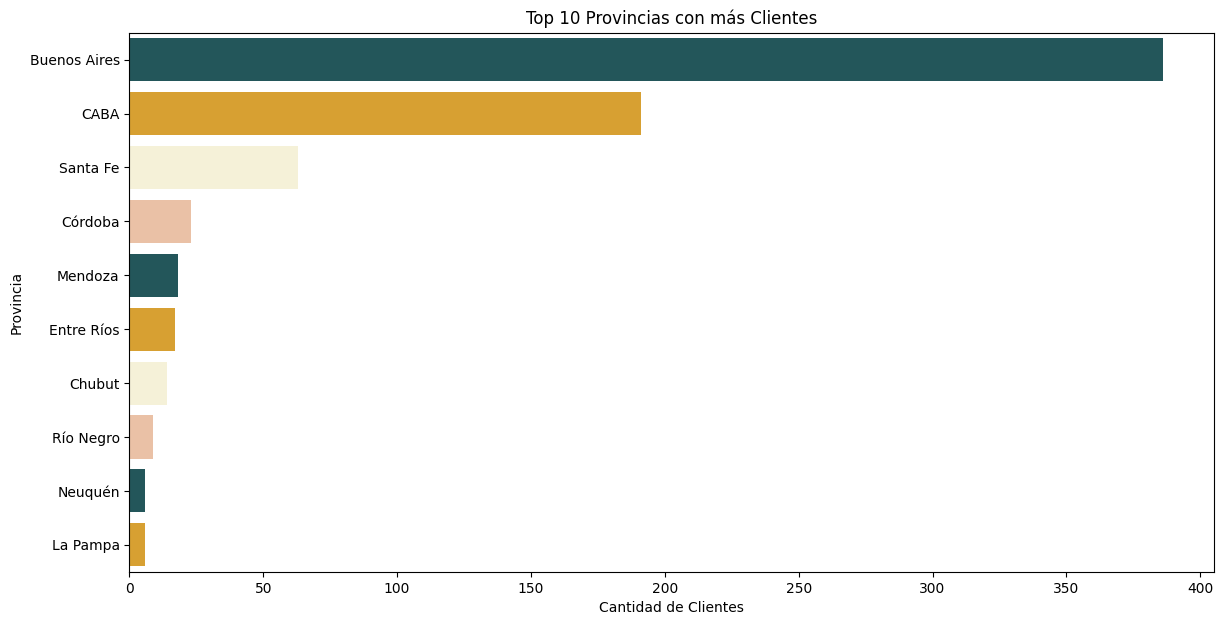

In [46]:
# Tomo las 10 provincias con más clientes para que el grafico se comprenda mejor
clientes_top10 = clientes_por_provincia.head(10)

plt.figure(figsize=(14, 7))
sns.barplot(data=clientes_top10, x='Cantidad_clientes', y='PROVINCIA', palette=['#1a5e63', '#f3a916', '#faf4d3', '#f6be9a'])
plt.title('Top 10 Provincias con más Clientes')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Provincia')
plt.show()


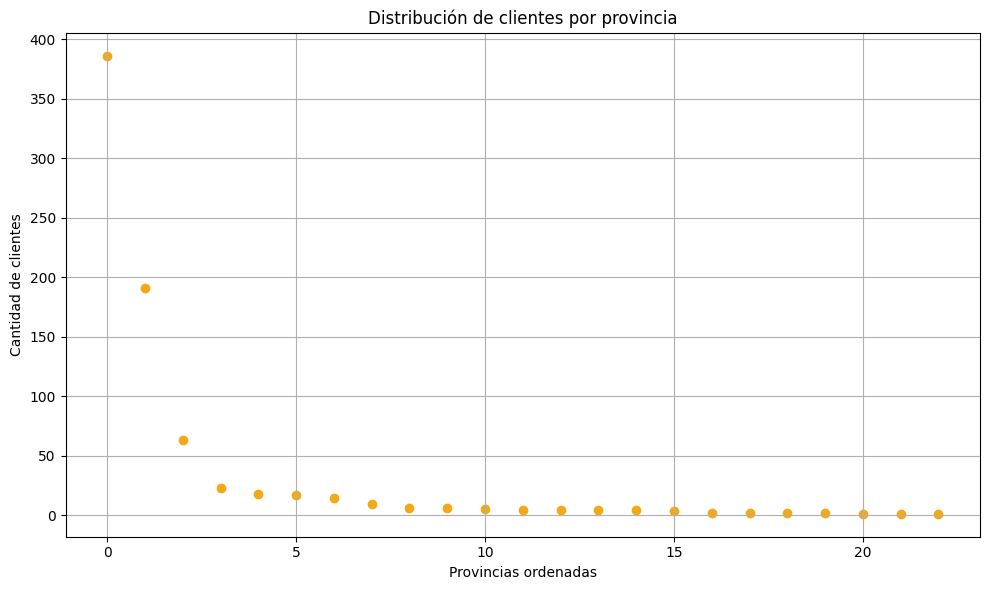

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(clientes_por_provincia)),
            clientes_por_provincia['Cantidad_clientes'],
            color=colores_marca[1])

plt.xlabel('Provincias ordenadas')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes por provincia')
plt.grid(True)
plt.tight_layout()
plt.show()



Se observa un comportamiento similar al de la plataforma de mercadolibre en terminos absolutos, sin tener en cuenta la densidad poblacional.

# Insights

👍 1. Clientes con mayor frecuencia de compra (fidelidad)

Se identificaron provincias donde los clientes realizan compras con mayor
frecuencia, lo que refleja altos niveles de fidelidad. Las provincias destacadas son Tucumán, Neuquén, Santa Cruz, Misiones y Mendoza. Esto sugiere una oportunidad para potenciar el crecimiento del mercado en estas zonas mediante estrategias de marketing dirigidas a nuevos clientes, aprovechando la alta fidelización ya existente.

👍 2. Provincias con alta frecuencia promedio no necesariamente tienen mayores ingresos totales.

 Aunque provincias como Buenos Aires y Capital Federal concentran los ingresos totales más altos, no tienen la frecuencia promedio de compra más elevada. Esto sugiere que existe un margen para desarrollar estrategias de fidelización y recompra en estas áreas, aprovechando la gran cantidad de clientes.

👍 3. Preferencia por talles grandes

Los datos revelan una clara preferencia por los talles grandes. Los talles más elegidos corresponden a 2XL, 3XL, 4XL y 5XL, lo cual es relevante para orientar la producción, el stock y las campañas de marketing.

# **Modelo de aprendizaje no supervisado**

Opte por el modelo de aprendizaje no supervisado debido que mi dataset no cuenta con una variable objetivo predefinida para entrenar al modelo como podría ser, por ejemplo, clientes leales o no leales, clientes frecuentes o clientes infrecuentes. Al intentar encontrar patrones que son posibles solo si son analizados con múltiples variables (frecuencia de compra, ingresos (gastos), talles y colores) métodos como el K-means y el Clustering jerarquico resultan útiles para encontrar similitudes en los patrones.

Método Clúster (k-means): Segmentacion de clientes

Busco con la implementación del método evaluar dos de los objetivos del presente trabajo. Cosidero que a traves de una segmentación de clientes basada, principalmete, en la frecuencia de compra y talle elegido, voy a poder visualizar:

Cuáles son los talles más vendidos de la marca "Tochana" en el mercado argentino.
Identificar posibles oportunidades de crecimiento y expansión para la marca en función del análisis de los distintos cluster de clientes para lograr estrategias focalizadas.
Procedo a evaluar el rendimiento del modelo de segmentación de clientes basado en el algoritmo K-Means, con k=4 (tras aplicar el método del codo).

In [48]:
print(df_ventas.columns)
print(df_clientes.columns)
print(df_ciudad.columns)
print(df_provincia.columns)

Index(['id_venta', 'id_clientes', 'ingresos por productos (ars)',
       'cargo por venta e impuestos', 'costos de envío', 'total (ars)',
       'id_publicaciones', 'id_color', 'id_talle'],
      dtype='object')
Index(['id_cliente', 'primer nombre', 'segundo nombre', 'apellido',
       'id_ciudad', 'código postal'],
      dtype='object')
Index(['id_ciudad', 'ciudad', 'id_provincia'], dtype='object')
Index(['id_provincia', 'provincia'], dtype='object')


In [49]:
# Unifico informacion de clientes y ventas
df_segmentacion = df_ventas.merge(
    df_clientes, left_on='id_clientes', right_on='id_cliente', how='inner'
).merge(
    df_ciudad, on='id_ciudad', how='inner'
).merge(
    df_provincia, on='id_provincia', how='inner'
)


In [50]:
print(df_segmentacion.columns) # Me aseguro que se hayan unido los campos correctos

Index(['id_venta', 'id_clientes', 'ingresos por productos (ars)',
       'cargo por venta e impuestos', 'costos de envío', 'total (ars)',
       'id_publicaciones', 'id_color', 'id_talle', 'id_cliente',
       'primer nombre', 'segundo nombre', 'apellido', 'id_ciudad',
       'código postal', 'ciudad', 'id_provincia', 'provincia'],
      dtype='object')


In [51]:
df_segmentacion = df_segmentacion.groupby('id_clientes').agg({
    'total (ars)': 'sum',
    'id_venta': 'count',
    'id_talle': lambda x: x.mode()[0] if not x.isnull().all() else np.nan,
    'id_color': lambda x: x.mode()[0] if not x.isnull().all() else np.nan,
    'provincia': 'first'
}).reset_index()

df_segmentacion.rename(columns={
    'total (ars)': 'ingresos_totales',
    'id_venta': 'frecuencia_compra',
    'id_talle': 'talle_preferido',
    'id_color': 'color_preferido'
}, inplace=True)

In [52]:
variables_cluster = df_segmentacion[['ingresos_totales', 'frecuencia_compra']]
# Escalo las variables
scaler = StandardScaler()
variables_escaladas = scaler.fit_transform(variables_cluster)

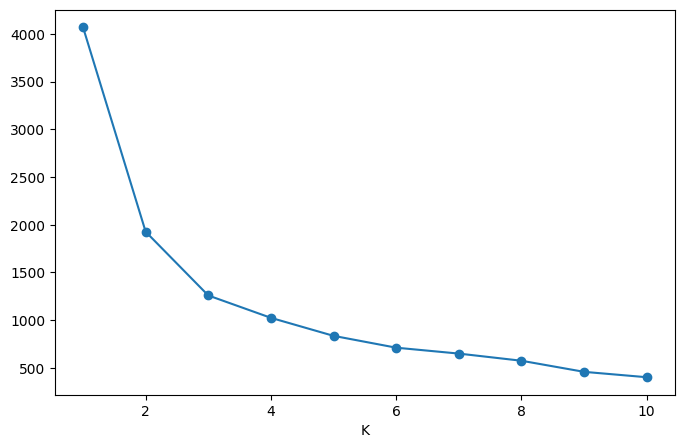

In [53]:
#Intento determinar utilizando el metodo codo el número óptimo de clústeres (K-means)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(variables_escaladas)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('K')
plt.show()


In [54]:
#Elegí 4 como valor óptimo de K para la utiliación de kmeans debido a que en el valor 4 se puede apreciar que comienza el equilibrio
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_segmentacion['Cluster'] = kmeans.fit_predict(variables_escaladas)

In [55]:
#Visualizo el resumen de los clústeres
resumen_cluster = df_segmentacion.groupby('Cluster').agg({
    'ingresos_totales': ['mean', 'median'],
    'frecuencia_compra': ['mean', 'median'],
    'talle_preferido': lambda x: x.mode()[0],
    'color_preferido': lambda x: x.mode()[0]
})

print(resumen_cluster)

        ingresos_totales             frecuencia_compra        talle_preferido  \
                    mean      median              mean median        <lambda>   
Cluster                                                                         
0           15508.861281   16018.120          1.015142    1.0             8.0   
1           47355.334149   47371.640          3.372340    3.0             8.0   
2          118766.011667  111323.245          4.666667    5.0             8.0   
3           38417.799202   37071.350          1.760736    2.0             8.0   

        color_preferido  
               <lambda>  
Cluster                  
0                   6.0  
1                   6.0  
2                   6.0  
3                   6.0  


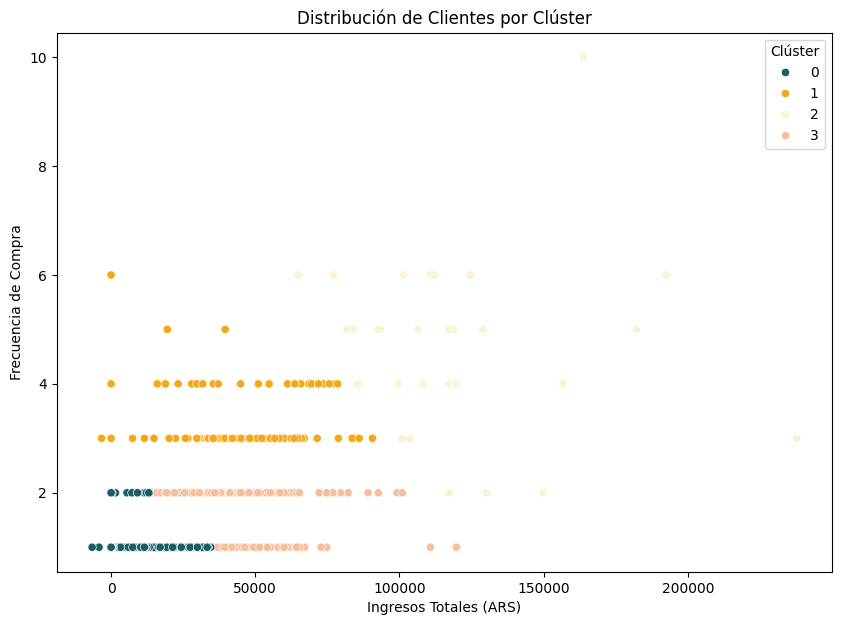

In [56]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_segmentacion, x='ingresos_totales', y='frecuencia_compra', hue='Cluster', palette=colores_marca)
plt.title('Distribución de Clientes por Clúster')
plt.xlabel('Ingresos Totales (ARS)')
plt.ylabel('Frecuencia de Compra')
plt.legend(title='Clúster')
plt.show()

Interpretación por clúster:

Cluster 0: Ingresos totales: Bajo (promedio: 15,508.86 ARS). Frecuencia de compra: Muy baja (promedio: 1 compra por cliente). Talle y color preferido: Talle 8 y color 6. Interpretación: Este clúster representa clientes esporádicos de bajo valor.

Cluster 1: Ingresos totales: Moderados (promedio: 47,355.33 ARS). Frecuencia de compra: Moderada (promedio: 3.37 compras por cliente). Talle y color preferido: Talle 8 y color 6. Interpretación: Clientes leales con compras regulares y contribución significativa al ingreso.

Cluster 2: Ingresos totales: Muy altos (promedio: 118,766.01 ARS). Frecuencia de compra: Alta (promedio: 4.67 compras por cliente). Talle y color preferido: Talle 8 y color 6. Interpretación: Clientes premium o de alto valor que compran con mayor frecuencia.

Cluster 3: Ingresos totales: Intermedios (promedio: 38,417.80 ARS). Frecuencia de compra: Baja-moderada (promedio: 1.76 compras por cliente). Talle y color preferido: Talle 8 y color 6. Interpretación: Clientes ocasionales, pero con un gasto mayor que el Clúster 0.

El talle más elegido es el talle 8, siendo este el más grande ofrecido por la marca.

In [57]:
print(f"Inercia intra-cluster (SSE): {kmeans.inertia_}")

Inercia intra-cluster (SSE): 1024.1353685206261


In [58]:
silhouette_avg = silhouette_score(variables_escaladas, kmeans.labels_)
print(f"Coeficiente de Silhouette: {silhouette_avg}")

Coeficiente de Silhouette: 0.6484475199611085


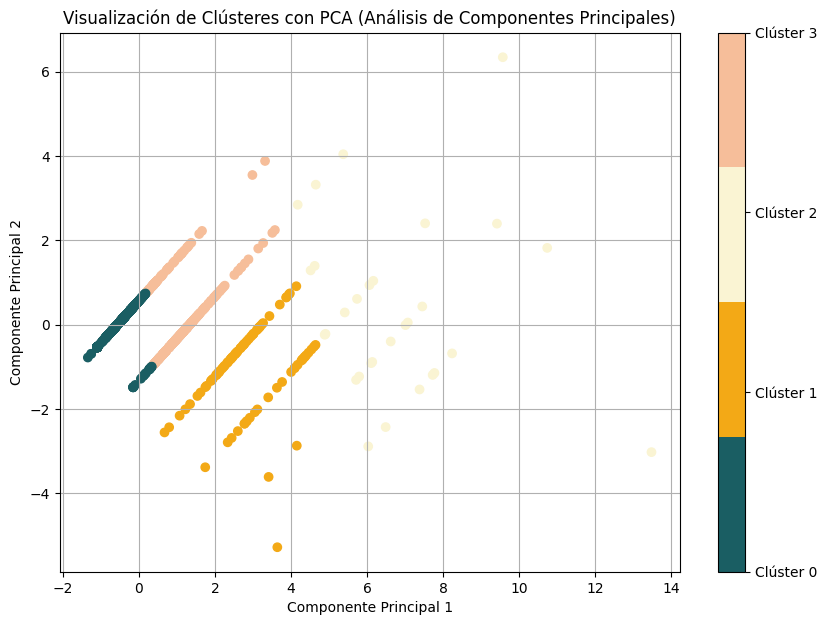

In [59]:
cmap = mcolors.ListedColormap(colores_marca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(variables_escaladas)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=kmeans.labels_,
    cmap=cmap,
)
cbar = plt.colorbar(scatter, ticks=range(len(colores_marca)))
cbar.ax.set_yticklabels([f'Clúster {i}' for i in range(len(colores_marca))])
plt.title('Visualización de Clústeres con PCA (Análisis de Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

Analisis del método Clúster

Métricas de Evaluación del método Cluster para la segmentacion de clientes


*  Inercia intra-cluster (SSE): El modelo tuvo un valor de inercia de 1024.13, lo cuál sugiere que los clústeres generados tienen son aceptablemente compactos y consistentes.
*   Coeficiente de Silhouette: Al obtener como resultado 0.648 y ser éste mayor a 0.5, puedo inferir que los clústeres estan separados entre sí de forma correcta y, en consecuencia, son distinguibles entre ellos. Lo cuál significa que los valores dentro de cada uno son más parecidos entre ellos que a los datos de otros clústeres.
*   Gráfico de clústeres con PCA: En el grafico obtenido se pueden visualizar cuatro clústeres claramente diferenciados, inifiriendo nuevamente que la elección de k=4 como el número óptimo de agrupamientos fue correcta. La clara separacion entre los clústeres sugiere que las variables seleccionadas para el modelo (ingresos, frecuencia de compra, color y talle preferido) son adecuadas para distinguir comportamientos de cada grupo de clientes lo cuál indica que puede ser utilizado para diseñar estrategias de ventas focalizadas.

**Recomendaciones estratégicas**

Cluster 2 representa una clara oportunidad para estrategias de fidelización  (programas exclusivos, acceso a nuevas colecciones antes que el publico general podria ser un catalogo preferencial mediante campaña de mail/whatsapp).

Cluster 1 puede beneficiarse de incentivos para aumentar la frecuencia (ej: combos, cupones por compras recurrentes).

Clusters 0 y 3 requieren acciones de remarketing para impulsar la recompra o aumentar el ticket (se pueden pensar combos o packs promocionales mediante campaña de mail focalizada para intenar recompra).

**Método clustering jerárquico**

Utilizo el método de clustering jerárquico para poder visualizar el número óptimo de clústeres que resulte del algoritmo del Dendrograma para contrastar con el resultado del método anterior. Utilicé como criterio de enlace la técnica de Ward para minimizar la varianza dentro de los clústeres y así poder lograr grupos más compactos que tengan una diferencia clara con el resto.

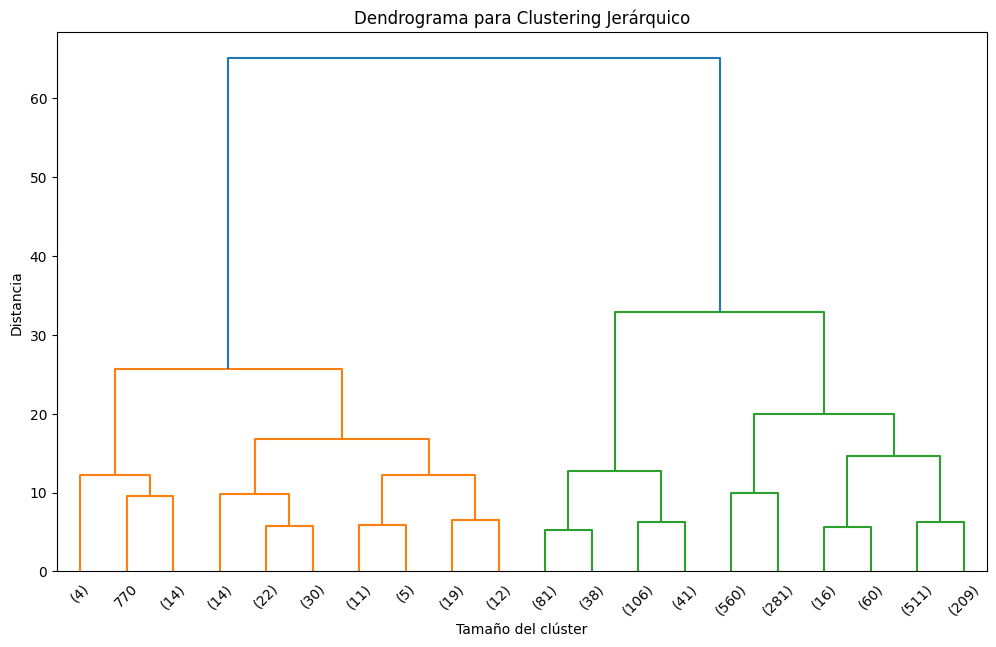

In [60]:
linkage_matrix = linkage(variables_escaladas, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Tamaño del clúster')
plt.ylabel('Distancia')
plt.show()

clustering_jerarquico = AgglomerativeClustering(n_clusters=4, linkage='ward')
clustering_jerarquico.fit(variables_escaladas)
df_segmentacion['Cluster_Jerarquico'] = clustering_jerarquico.labels_


Se observan dos grandes clústeres principales que tienen una distancia grande el uno del otro lo cuál permite inferir que guardan entre sí grandes diferencias. Más abajo se puede ver una ramificación de cada uno en dos subgrupos, que permite dividir a los clientes en cuatro clústures.

Analizando ambos métodos utilizados es coincidente la obtención de cuatro grupos de compradores diferenciados entre sí.

In [61]:
#Visualizo el resúmen de los clústeres generados
resumen_jerarquico = df_segmentacion.groupby('Cluster_Jerarquico').agg({
    'ingresos_totales': ['mean', 'median'],
    'frecuencia_compra': ['mean', 'median'],
    'talle_preferido': lambda x: x.mode()[0],
    'color_preferido': lambda x: x.mode()[0]
})

print(resumen_jerarquico)

                   ingresos_totales            frecuencia_compra         \
                               mean     median              mean median   
Cluster_Jerarquico                                                        
0                      17010.054337   16273.53          1.000000    1.0   
1                      60068.541504   59450.92          3.203540    3.0   
2                      30604.542331   30718.10          2.018797    2.0   
3                     123479.843684  111951.91          5.473684    5.0   

                   talle_preferido color_preferido  
                          <lambda>        <lambda>  
Cluster_Jerarquico                                  
0                              8.0             6.0  
1                              8.0             6.0  
2                              8.0             6.0  
3                              6.0             6.0  


In [62]:
n_clusters = 4 #Elijo nuevamente cortar en 4 clúster para el análisis
labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

intra_cluster_distances = []
for cluster in range(1, n_clusters + 1):
    cluster_points = variables_escaladas[labels == cluster]
    distances = pdist(cluster_points)
    intra_cluster_distances.append(distances.mean())

print("Distancias intra-cluster:", intra_cluster_distances)


Distancias intra-cluster: [np.float64(3.3882866088890613), np.float64(2.155327126172041), np.float64(0.8141572938548101), np.float64(0.5224240201250625)]


In [63]:
centroides = []
for cluster in range(1, n_clusters + 1):
    cluster_points = variables_escaladas[labels == cluster]
    centroides.append(cluster_points.mean(axis=0))

inter_cluster_distances = []
for i in range(len(centroides)):
    for j in range(i + 1, len(centroides)):
        dist = euclidean(centroides[i], centroides[j])
        inter_cluster_distances.append(dist)

print("Distancias inter-cluster:", inter_cluster_distances)

Distancias inter-cluster: [4.498152713409024, 6.7074065796496205, 8.179812081600506, 2.2117497688530947, 3.7134763477499524, 1.539858222200377]


In [64]:
linkage_matrix = linkage(variables_escaladas, method='ward')
labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

In [65]:
silhouette_avg = silhouette_score(variables_escaladas, labels)
print("Coeficiente de Silhouette:", silhouette_avg)

Coeficiente de Silhouette: 0.6428901354734259


Analisis del método clustering jerárquico

Métricas de Evaluación del método Cluster para la segmentacion de clientes:



*   Coeficiente de Silhouette: Se obtuvo como resultado 0.642 siendo éste muy similar al obtenido por el método no jerárquico.
*  Distancia intra-clúster: Clúster 1: 3.39 Clúster 2: 2.16 Clúster 3: 0.81 Clúster 4: 0.52. Las distancias internas de cada clúster son chicas, sin embargo, se puede visualizar que los grupos 3 y 4 son más compactos y en consecuecia más homogéneos.
* Distancia inter-clúster: Entre Clúster 1 y 2: 4.50 Entre Clúster 1 y 3: 6.71 Entre Clúster 1 y 4: 8.18 Entre Clúster 2 y 3: 2.21 Entre Clúster 2 y 4: 3.71 Entre Clúster 3 y 4: 1.54. En esta métrica se observan principalmente dos situaciones. Las mayores distancias se obtuvieron entre el Clúster 1 y el Clúster 4, y entre el Clúster 1 y el Clúster 3. Esto indica que estos clústeres tienen una buena diferenciación entre sus puntos. Por otro lado, las distancias más chicas se visualizan entre el Clúster 3 y el Clúster 4 y el Clúster 2 y el Clúster 3, lo que indica que estos clústeres están más cercanos entre sí y podrían tener características similares. La distancia entre el 3 y el 4 requiere un mayor análisis, contemplando la posibilidad de reducir el número de clústeres.

# Modelo de aprendizaje no supervisado

En esta instancia del trabajo y con el objetivo de enriquecer el análisis y avanzar en la comprensión del comportamiento de los clientes, opte por  implementar un modelo de aprendizaje supervisado utilizando el método de árbol de decisión.

Este enfoque se diferencia de los algoritmos de aprendizaje no supervisado (como K-Means o clustering jerárquico), ya que en este caso se dispone de una variable objetivo conocida que permite al modelo aprender relaciones y patrones específicos en los datos. Busco con esto, predecir si un cliente es valioso o no valioso, es decir, si genera ingresos totales por encima de la mediana del dataset. Esta clasificación permite identificar a los clientes facilitando el diseño de estrategias de fidelización o campañas específicas para retenerlos.

In [66]:
#Creo una variable para ver el promedio gastado por compra para cada cliente
df_segmentacion['ticket_promedio'] = df_segmentacion['ingresos_totales'] / df_segmentacion['frecuencia_compra']


In [67]:
#Creo una categoria binaria para clientes valiosos o no, que va a depender de si su ingreso total esta por encima de la mediana
df_segmentacion['cliente_valioso'] = (df_segmentacion['ingresos_totales'] > df_segmentacion['ingresos_totales'].median()).astype(int)

In [68]:
#Entreno un modelo de clasificación (árbol de decisión) para predecir si el cliente es o no valioso
X = df_segmentacion[['frecuencia_compra', 'ticket_promedio']].fillna(0)
y = df_segmentacion['cliente_valioso']

clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5) #Utilizo la tecnica de validación cruzada dividiendo los datos del dataset en 5 partes, donde se entrenan 4 y se evalúa en 1
print("Accuracy promedio con cross-val:", scores.mean())


Accuracy promedio con cross-val: 0.9926289926289927


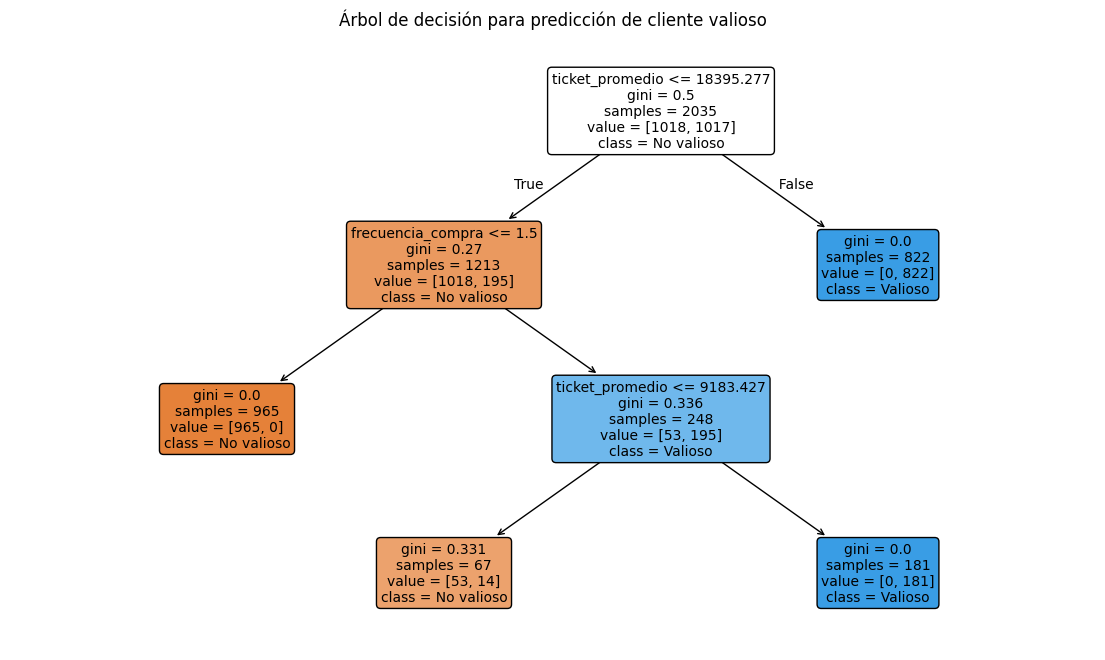

In [69]:
# Grafico arbol de decisión
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(14,8))
plot_tree(clf,
          feature_names=['frecuencia_compra', 'ticket_promedio'],
          class_names=['No valioso', 'Valioso'],
          filled=True, rounded=True, fontsize=10)
plt.title("Árbol de decisión para predicción de cliente valioso")
plt.show()


Debido a la magnitud y complejidad moderada de mi dataset opte por utilizar el Grid Search CV como método de optimización de hiperparametros del arbol con el objetivo de mejorar la capacidad predictiva del modelo

In [70]:
#Defino la grilla de hiperparámetros a testear
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Creo el árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

#Configuro el GridSearch con validación cruzada
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

#Entreno el modelo
grid_search.fit(X, y)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor accuracy promedio:", grid_search.best_score_)


Mejores hiperparámetros encontrados: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor accuracy promedio: 0.9970515970515971


Siendo que el arbol realizado anteriormente fue entrenado con una profundidad fija de 3 y analizando el resultado de los hiperparametros óptimos particularmente el que ofrece que lo óptimo es una profundidad de 5 voy a proceder a realizar nuevamente el método utilizando los mejores hiperparámetros

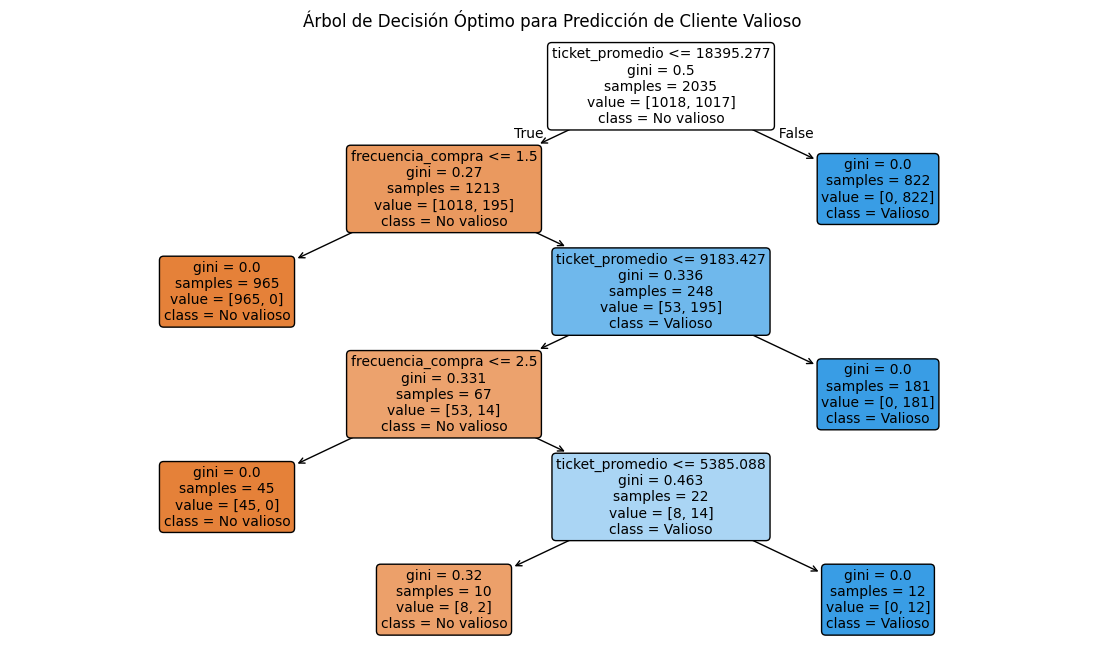

In [71]:
#Creo el Arbol con los mejores hiperparámetros
clf_optimo = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf_optimo.fit(X, y)

plt.figure(figsize=(14, 8))
plot_tree(clf_optimo,
          feature_names=['frecuencia_compra', 'ticket_promedio'],
          class_names=['No valioso', 'Valioso'],
          filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión Óptimo para Predicción de Cliente Valioso")
plt.show()


Se observa un árbol más profundo, mayores combinaciones entre la frecuencia de compra y el ticket promedio. Hay una división mas real entre clientes valiosos y no valiosos con mayor cantidad de reglas para definir estrategias.

Sin embargo se puede pensar en un posible overfitting por algunas razones. En primer lugar hay 5 nodos que tienen por resultado un Gini=0 que puede dar cuentas de demasiado ajuste. Por otro lado el valor de los tickets promedio son recortes muy específicos que difieren de los valores más generales existentes en los datos. Para finalizar, los dos últimos nodos tienen pocos datos (samples = 10 y samples = 12).

A raíz de este riego de sobreajuste utilizo la matriz de confusión en test para realizar una evaluación del modelo con el fin de verificar si las decisiones también funcionan bien con datos no vistos.

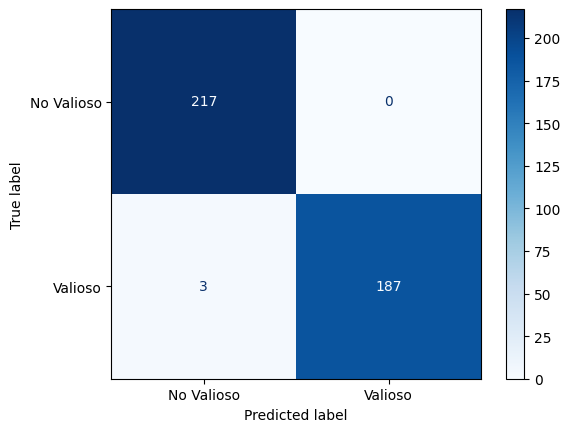

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creo variables predictoras y objetivo
X = df_segmentacion[['frecuencia_compra', 'ticket_promedio']].fillna(0)
y = df_segmentacion['cliente_valioso']

# división en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Se entrena el modelo optimizado con los hiperparámetros encontrados
clf_optimizado = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf_optimizado.fit(X_train, y_train)

#redicciones
y_pred = clf_optimizado.predict(X_test)

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Valioso', 'Valioso'])

disp.plot(cmap='Blues')


**Interpretación**:

TP (Verdaderos Positivos) = 187
Clientes valiosos correctamente identificados como tal.

TN (Verdaderos Negativos) = 217
Clientes no valiosos correctamente identificados.

FP (Falsos Positivos) = 0
No hay ningún cliente no valioso que haya sido erróneamente clasificado como valioso.

FN (Falsos Negativos) = 3
Solo 3 clientes valiosos fueron mal clasificados como no valiosos.

El árbol de decisión optimizado mediante GridSearchCV logró una clasificación precisa sobre el conjunto de prueba.

**✨ Recomendaciones Comerciales**

1. Segmentación inclusiva y expansión de talles

📌 Insight: Los talles grandes (2XL a 5XL) presentan alta demanda, lo que revela un nicho de mercado poco atendido.

Recomendación:
Desarrollar una línea visual que celebre la diversidad corporal. Incorporar modelos de talles reales en campañas y etiquetar productos destacados con etiquetas "pluszise" para mejorar la conversión. A nivel comercial, incrementar el stock y variedad de talles grandes, priorizando su presencia en productos con alta rotación.

2. Reactivación de la cartera en Buenos Aires y CABA

📌 Insight: Son las regiones con mayores ingresos, pero menor frecuencia de compra individual.

Recomendación:
Diseñar un plan de fidelización específico para clientes de estas zonas:

Programas de puntos por recompra.

Acceso anticipado a lanzamientos exclusivos.

Comunicación personalizada vía email o WhatsApp según historial de compras.
Apuntar a transformar compradores ocasionales en clientes recurrentes.

3. Estrategia de crecimiento en provincias de alta fidelidad

📌 Insight: Provincias como Tucumán, Neuquén, Santa Cruz y Misiones muestran clientes con alta frecuencia de compra, lo que indica una fuerte conexión con la marca.

Recomendación:
Capitalizar este engagement con estrategias de expansión de base:

Campañas de referidos con beneficios para ambas partes.

Publicidad localizada

Activaciones específicas: descuentos por códigos regionales y envíos gratuitos.

4. Optimización logística regional y comunicación por experiencia

📌 Insight: La dispersión geográfica de la demanda obliga a pensar una estrategia logística diferencial.

Recomendación:
Implementar un modelo logístico híbrido:

Comunicar proactivamente plazos reales según ubicación durante la compra para reducir fricción y mejorar satisfacción.

Crear experiencias de entrega diferenciadas: empaque personalizado, seguimiento en tiempo real, o mensajes post-compra con foco emocional.